🍿**NETFLIX DATA ANALYSIS**

In [ ]:
# importing necessary libraries for analysis and visualization

import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Data Preparation & Cleaning**

In [ ]:
df=pd.read_csv("/content/netflix_dataset.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


This Dataset contains many NaN values,that NaN values are droped.

In [ ]:
df.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [ ]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
grp=df.groupby('type')
print(grp)

In [ ]:
for grpname,grpdetails in grp:
  print("*"*50)
  print("*"*50)
  print("*"*50)
  print("\tGroupName:",grpname)
  print("*"*50)
  print("*"*50)
  print("*"*50)
  print("\tGroupDetails:",grpdetails)

**************************************************
**************************************************
**************************************************
	GroupName: Movie
**************************************************
**************************************************
**************************************************
	GroupDetails:      show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie               

In [ ]:
df.groupby('type').first()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,s1,Dick Johnson Is Dead,Kirsten Johnson,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
TV Show,s2,Blood & Water,Julien Leclercq,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df.groupby('type').first()['title']

,title
type,
Movie,Dick Johnson Is Dead
TV Show,Blood & Water


In [ ]:
grp1=df.groupby('listed_in')
print(grp1)

In [ ]:
for grpname,grpdetails in grp1:
  print("*"*50)
  print("\tGroupName:",grpname)
  print("*"*50)
  print("\tGroupDetails:",grpdetails)

Streaming output truncated to the last 5000 lines.
964   A young woman discovers that both her husband ...  
1100  Back home at her lake house, a teenager begins...  
1118  A family moves into a new home, where their so...  
1139  A series of mysterious events makes a teenager...  
1283  When a family starts experiencing supernatural...  
1447  A naïve social worker brings a 10-year-old chi...  
1536  An unconventional demon hunter faces his great...  
1843  Six teens whose cyberbullying drove their clas...  
2149  A night at a 1980s heavy metal concert hits a ...  
2382  After bringing home a set of mysterious stones...  
3450  After hearing a boy's cry for help, a pregnant...  
3930  With the world under attack by deadly creature...  
4532  A brother-sister team who fake paranormal enco...  
5073  Following a tragedy, a mother and her teen son...  
5091  Still mourning the death of their son, Mark an...  
5252  When her husband's sex game goes wrong, Jessie...  
5318  Light Turner fi

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


     show_id     type                        title director  \
4677   s4678  TV Show  Ultimate Beastmaster México      NaN   

                                                   cast country  \
4677  Luis Ernesto Franco, Inés Sainz, Tiki Barber, ...     NaN   

           date_added  release_year rating   duration  \
4677  August 31, 2018          2018  TV-PG  3 Seasons   

                                  listed_in  \
4677  Reality TV, Spanish-Language TV Shows   

                                            description  
4677  Competitors representing countries from around...  
**************************************************
	GroupName: Reality TV, TV Action & Adventure, TV Mysteries
**************************************************
	GroupDetails:     show_id     type     title director             cast        country  \
657    s658  TV Show  The Mole      NaN  Anderson Cooper  United States   

        date_added  release_year rating   duration  \
657  June 21, 2021          20

In [ ]:
df[df['rating'].isin(['74 min', '84 min', '66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


By Mistankely duration and rating values are swapped .Duration contains the values of rating and Rating contains the values of duration.
--> TO resolve the issue values are swapped for correct values.

In [ ]:
df.loc[df['rating'].isin(['74 min', '84 min', '66 min']),'duration']=df.loc[df['rating'].isin(['74 min', '84 min', '66 min']),'rating']
df.loc[df['rating'].isin(['74 min', '84 min', '66 min']),'rating']=np.nan
df.iloc[['5541','5794','5813']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,7
duration,0


Missing Values In "Director, Cast, and Country" Columns are Filled with 'Empty' to ensure data consistency.
Missing Values In "Rating" Columns are Filled with 'Empty' to ensure data consistency.

In [ ]:
df.loc[df['director'].isna(),'director']='Empty'
df.loc[df['cast'].isna(),'cast']='Empty'
df.loc[df['country'].isna(),'country']='Empty'

In [ ]:
df.loc[df['rating'].isna(),'rating']='Empty'

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


In [ ]:
df.loc[df['rating'].isna(),'description']

,description


In [ ]:
df.loc['s5541','rating']='TV-MA'
df.loc['s5794','rating']='TV-MA'
df.loc['s5813','rating']='TV-MA'
df.loc['s5989','rating']='TV-PG'
df.loc['s6827','rating']='TV-PG'
df.loc['s7312','rating']='TV-Y7'
df.loc['s7537','rating']='TV-MA'

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',errors='coerce')

date_added column is in object(type), so it has been converted to datetime(type)

In [ ]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Empty,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013.0,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Empty,Anthony Bourdain,United States,NaT,2018.0,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Empty,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003.0,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Empty,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003.0,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Empty,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008.0,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Empty,Igor Dmitriev,Empty,NaT,2010.0,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Empty,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012.0,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Empty,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016.0,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Empty,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015.0,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Empty,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015.0,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
df.drop(labels=['s5541','s5794','s5813','s5989','s6827','s7312','s7537'],axis=0,inplace=True)

In [ ]:
df['year']=df['date_added'].dt.year
(df['year']-df['release_year']).median()

1.0

In [ ]:
df['release_year_form']=pd.to_datetime(df['release_year'])

In [ ]:
df.loc[df['date_added'].isna(),'date_added']=df.loc[df['date_added'].isna(),'release_year_form']+pd.Timedelta(days=365)
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df.iloc[['8182','7847']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,release_year_form
8182,s8183,TV Show,The Adventures of Figaro Pho,Empty,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,1971-01-01 00:00:00.000002015,2015.0,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,1970-01-01 00:00:00.000002015
7847,s7848,TV Show,Red vs. Blue,Empty,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1971-01-01 00:00:00.000002015,2015.0,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,1970-01-01 00:00:00.000002015


In [ ]:
df.drop(columns=['year','release_year_form'],inplace=True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


All the missing values are removed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   float64       
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,date_added,release_year
count,8807,8807.000000
mean,2019-04-27 04:30:26.365391360,2014.180198
min,1971-01-01 00:00:00.000002003,1925.000000
25%,2018-04-03 00:00:00,2013.000000
50%,2019-07-01 00:00:00,2017.000000
75%,2020-08-18 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [ ]:
df['count_Countries']=df['country'].str.split(',').str.len()
df['count_cast']=df['cast'].str.split(',').str.len()
df['count_director']=df['director'].str.split(',').str.len()

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count_Countries,count_cast,count_director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Empty,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,1,1
1,s2,TV Show,Blood & Water,Empty,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,19,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Empty,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,9,1


In [ ]:
rating_grp={
    'Childrens':['TV-Y','TV-Y7','TV-G','G','TV-Y7-FV'],
    'Teenagers':['TV-PG','PG','PG-13','TV-14'],
    'Elders':['TV-MA','R','NC-17','NR','UR']
}
def category(x):
  for a,b in rating_grp.items():
    if x['rating'] in b:
      return a
df['category']=df.apply(lambda x: category(x),axis=1)

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count_Countries,count_cast,count_director,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Empty,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,1,1,Teenagers
1,s2,TV Show,Blood & Water,Empty,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,19,1,Elders
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Empty,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,9,1,Elders
3,s4,TV Show,Jailbirds New Orleans,Empty,Empty,Empty,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,1,1,Elders
4,s5,TV Show,Kota Factory,Empty,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,8,1,Elders


In [ ]:
df_type = df['type'].value_counts()
df_type

,count
type,
Movie,6131
TV Show,2676


** EDA & Visualization**

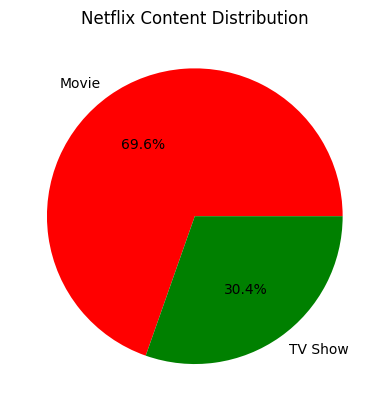

In [ ]:
plt.pie(
    df_type,
    labels = df_type.index,
    autopct='%1.1f%%',
    colors=['red','green']
)
plt.title('Netflix Content Distribution')
plt.show()

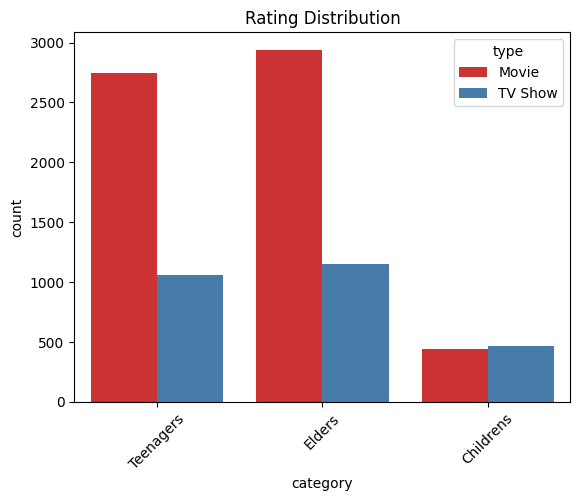

In [ ]:
sns.countplot(
    data=df,
    x='category',
    hue='type',
    palette='Set1'
)
plt.title('Rating Distribution')
plt.xticks(rotation=45)
plt.show()

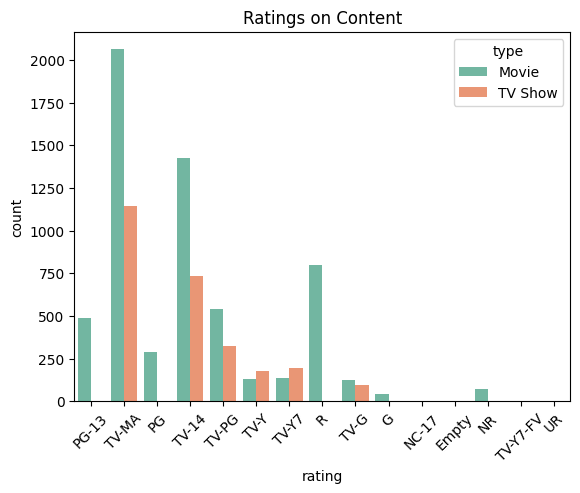

In [ ]:
sns.countplot(
    data=df,
    x='rating',
    hue='type',
    palette='Set2'
)
plt.title('Ratings on Content')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_lst=df['listed_in'].value_counts().head(10)
df_lst

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


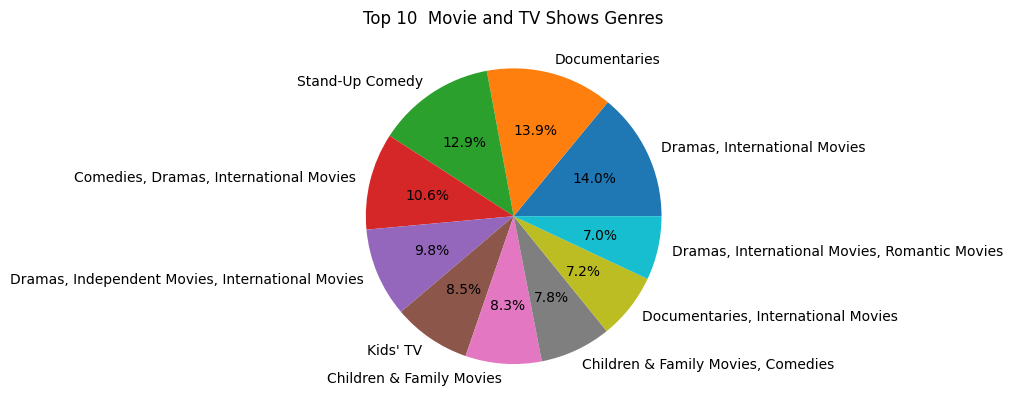

In [ ]:
# Top 10 Movies and TV shows Genres

plt.pie(
    df_lst,
    labels= df_lst.index,
    autopct='%1.1f%%'
)
plt.title('Top 10  Movie and TV Shows Genres')
plt.show()

In [ ]:
df_country=df['country'].value_counts().head(6)
df_country=pd.DataFrame(df_country)
df_country

,count
country,
United States,2818
India,972
Empty,831
United Kingdom,419
Japan,245
South Korea,199


In [ ]:
df_country.drop('Empty',inplace=True)

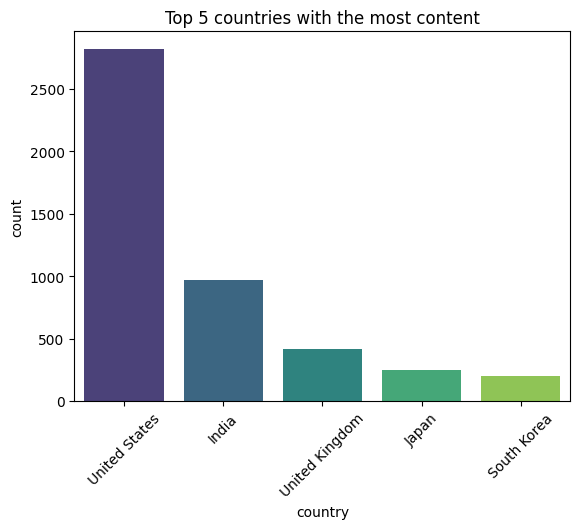

In [ ]:
# Top 5 countries with the most content

sns.barplot(
    data=df_country,
    x=df_country.index,
    y='count',
    palette='viridis'
)
plt.title("Top 5 countries with the most content")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_director=df['director'].value_counts().head(10)
df_director=pd.DataFrame(df_director)
df_director

,count
director,
Empty,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


In [ ]:
df_director.drop('Empty',inplace=True)

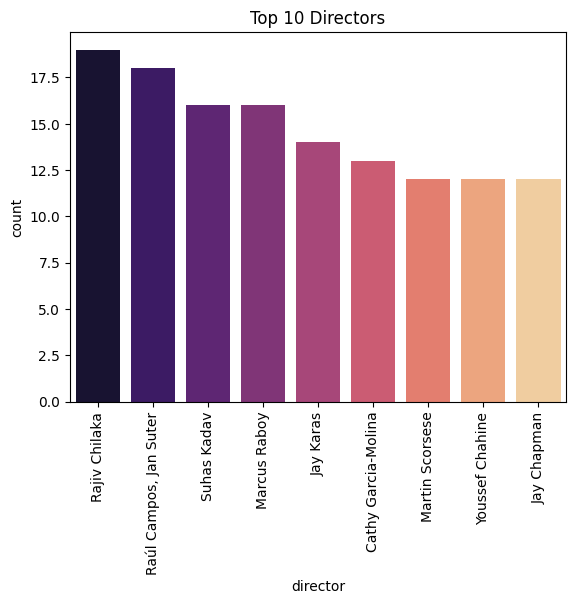

In [ ]:
# Top 10 Directors

sns.barplot(
    data=df_director,
    x=df_director.index,
    y='count',
    palette='magma'
)
plt.title('Top 10 Directors')
plt.xticks(rotation=90)
plt.show()

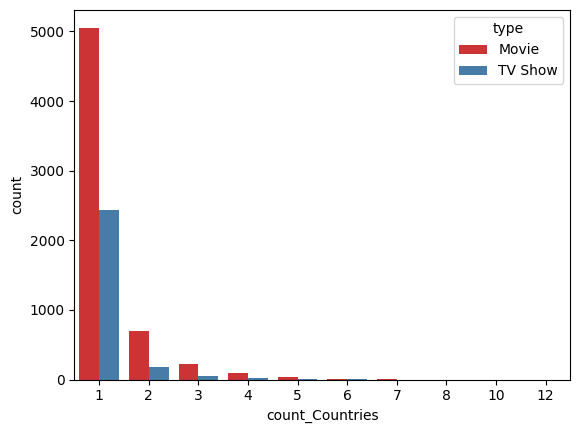

In [ ]:
sns.countplot(
    data=df,
    x='count_Countries',
    hue='type',
    palette='Set1'
)
plt.show()

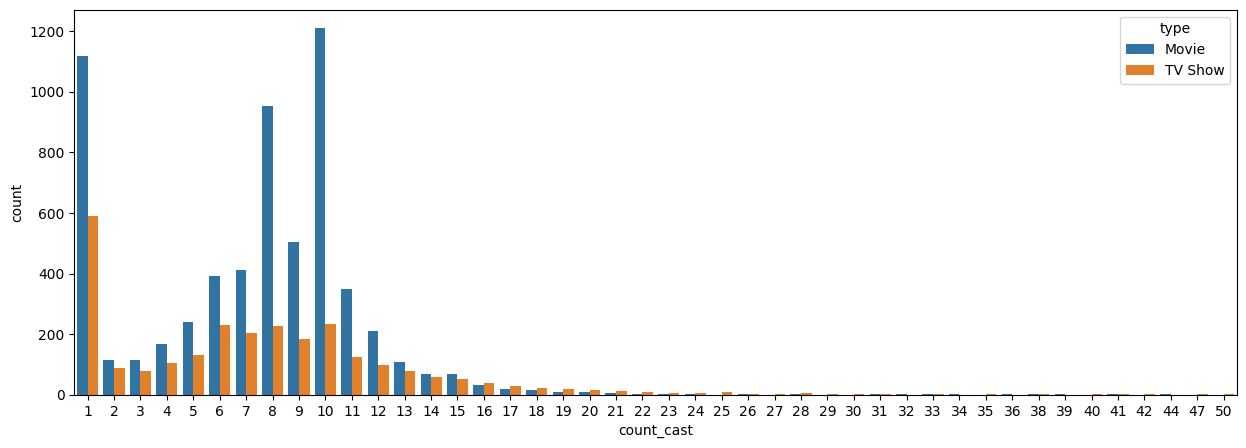

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=df,
    x='count_cast',
    hue='type'
)
plt.show()

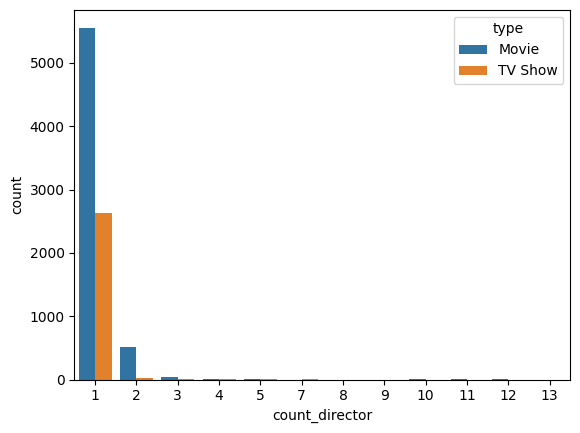

In [ ]:
sns.countplot(
    data=df,
    x='count_director',
    hue='type'
)
plt.show()

In [ ]:
df_date=df['date_added'].dt.year
df_date=pd.DataFrame(df_date)
df_date

,date_added
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


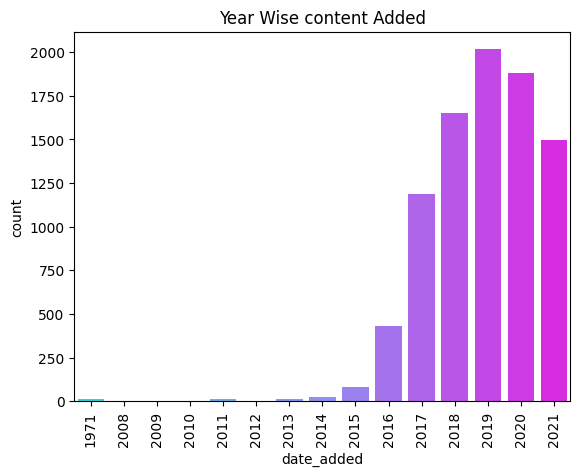

In [ ]:
sns.countplot(
    data=df_date,
    x='date_added',
    palette='cool'
)
plt.title('Year Wise content Added')
plt.xticks(rotation=90)
plt.show()

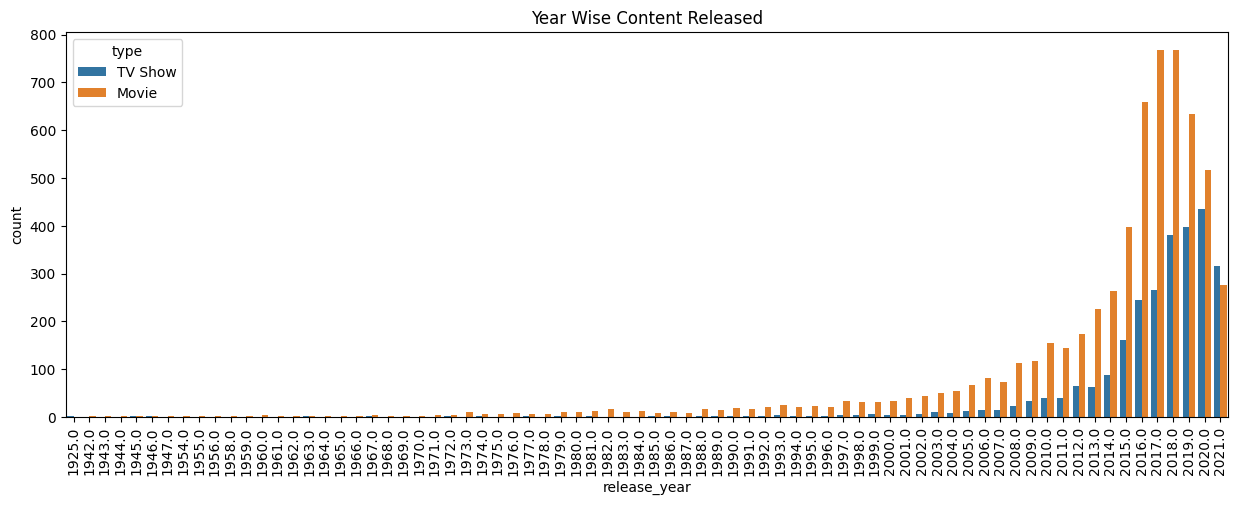

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=df,
    x='release_year',
    hue='type'
)
plt.title("Year Wise Content Released")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
df[df['duration'].isin(['1 Season', '2 Seasons', '3 Seasons'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count_Countries,count_cast,count_director,category
1,s2,TV Show,Blood & Water,Empty,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,19,1,Elders
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Empty,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,9,1,Elders
3,s4,TV Show,Jailbirds New Orleans,Empty,Empty,Empty,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,1,1,Elders
4,s5,TV Show,Kota Factory,Empty,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,8,1,Elders
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Empty,2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,16,1,Elders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Empty,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2,5,1,Childrens
8796,s8797,TV Show,Yunus Emre,Empty,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",1,18,1,Teenagers
8797,s8798,TV Show,Zak Storm,Empty,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016.0,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,4,7,1,Childrens
8800,s8801,TV Show,Zindagi Gulzar Hai,Empty,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1,9,1,Teenagers


In [ ]:
df['duration_min'] = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)
df['duration_seasons'] = df[df['type'] == 'TV Show']['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(float)

In [ ]:
df['duration_min'].head()

,duration_min
0,90.0
1,NaN
2,NaN
3,NaN
4,NaN


Text(0.5, 1.0, 'Distribution of Movie Duration')

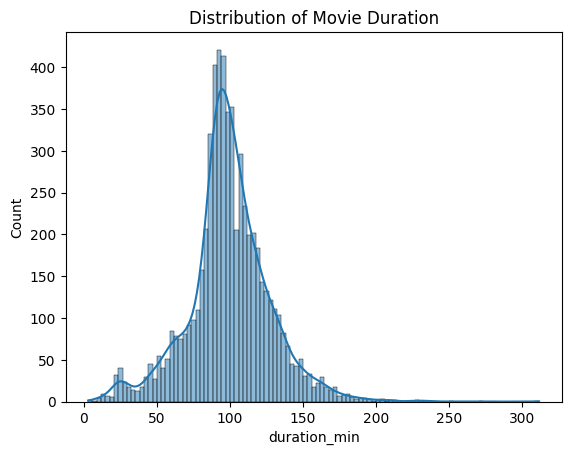

In [ ]:
sns.histplot(
    df['duration_min'],
    kde=True
)
plt.title('Distribution of Movie Duration')

In [ ]:
df['duration_seasons'].head()

,duration_seasons
0,NaN
1,2.0
2,1.0
3,1.0
4,2.0


Text(0.5, 1.0, 'Distribution of TV shows Duration')

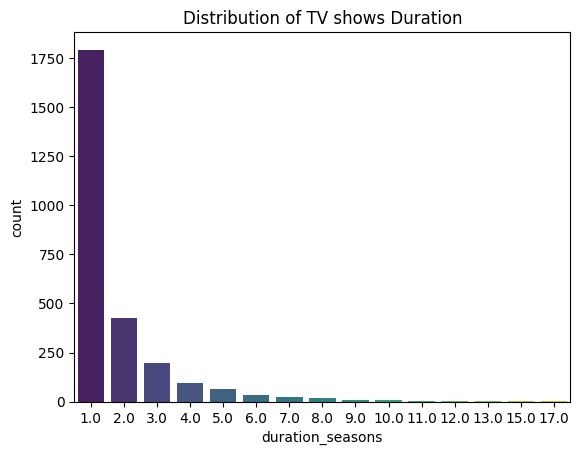

In [ ]:
sns.countplot(
    data=df,
    x=df['duration_seasons'],
    palette='viridis'
  )
plt.title('Distribution of TV shows Duration')

** Observations**

1. Analyzing content genres,countries ,release patterns ,cast,rating  and duration on netflix.
2. Datasets contains 8807 entries.
3. Movies constitute a large proportion of content on netflix than TV shows with Movies at 69.6% and TV shows at 30.7%.
4. The proportion of elders content is higher than teenagers than kids.
5. The rating TV-MA is higher than other ratings.
6. The years between 2017 and 2021 has the highest number of releases of Movies and TV shows , in which 2019 is the highest peak year.
7. In 2017 and 2018 highest numbers of Movies were released ,In 2020 highest numbers of TV shows were releases.
8. Every year, more movies were released than TV shows.
9. Most Movies have a duration ranging from 75 to 125 minutes.
10. Most TV shows consists of only one season.